#Project 1 : Cardiovascular Disease Prediction

Inporting the required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Load Dataset

In [5]:
df = pd.read_csv('cardio_train.csv', sep=';')
df.drop('id', axis=1, inplace=True)  # Drop 'id' column if present

Basic Info

In [7]:
print(df.shape)
print(df.info())
print(df.isnull().sum())
print(df['cardio'].value_counts())  # Target distribution

(70000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB
None
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
cardio
0    35021


In [8]:
df['age_years'] = (df['age'] / 365).astype(int)
df.drop('age', axis=1, inplace=True)

Feature Engineering

In [10]:
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)
X = df.drop('cardio', axis=1)  # Features
y = df['cardio']               # Target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Exploratory Data Analysis

Correlation Heatmap:

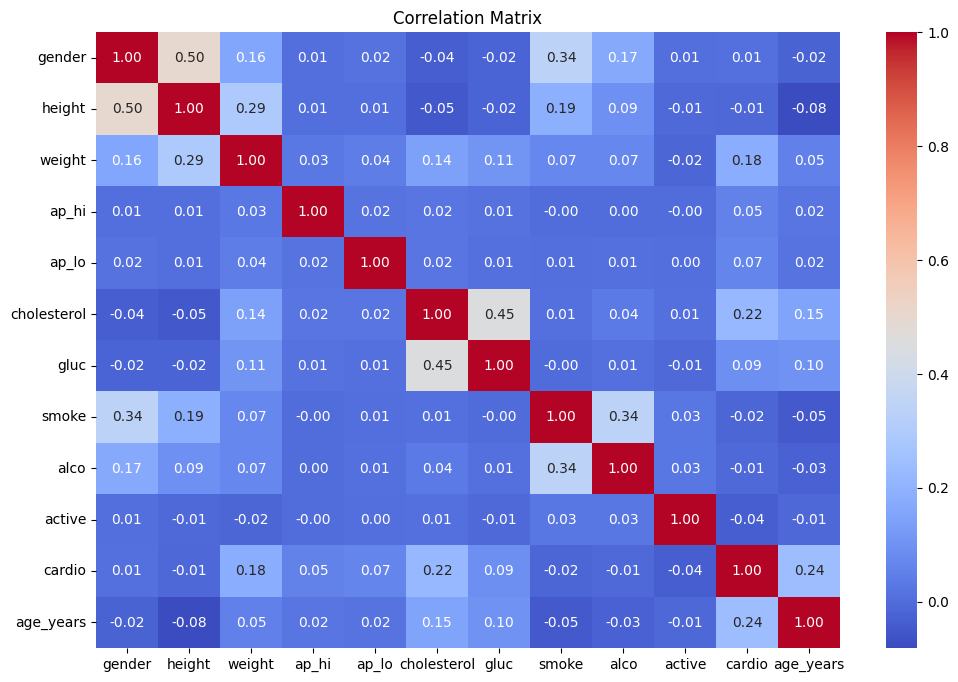

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Target Distribution:

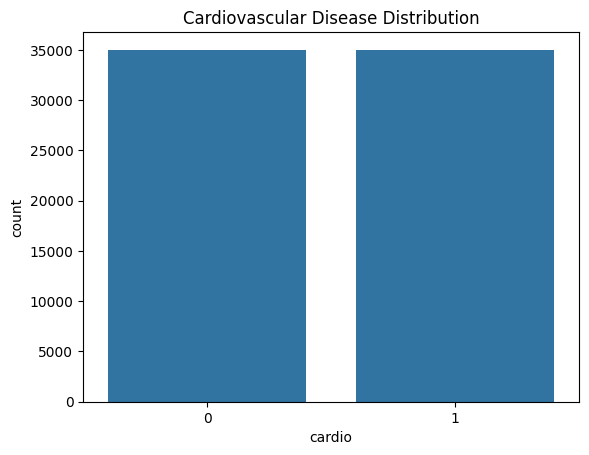

In [15]:
sns.countplot(x='cardio', data=df)
plt.title("Cardiovascular Disease Distribution")
plt.show()

Boxplots for Continuous Variables:

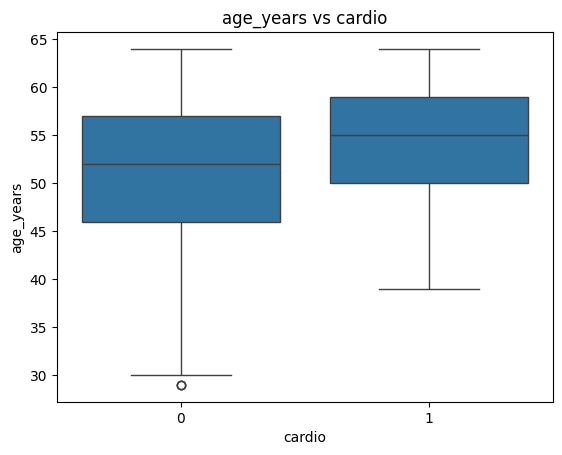

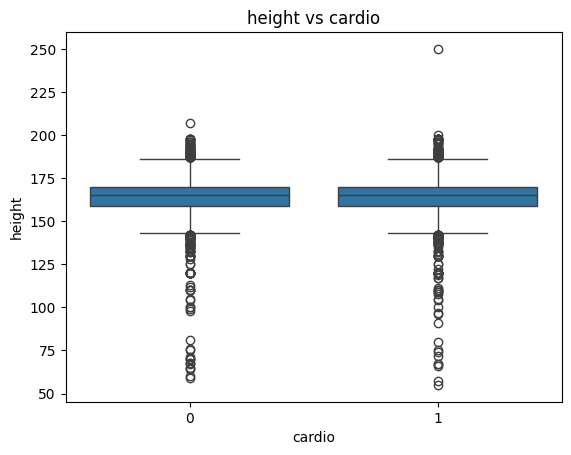

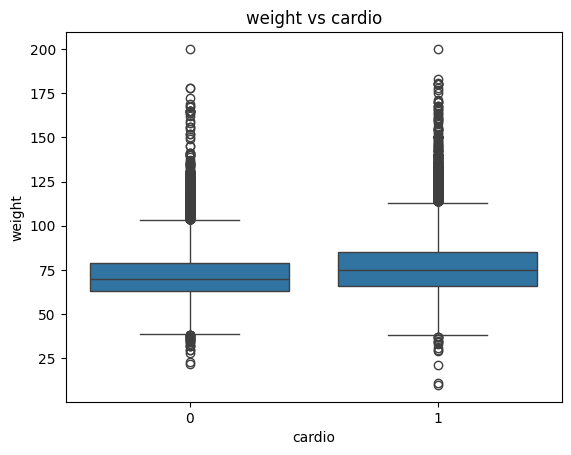

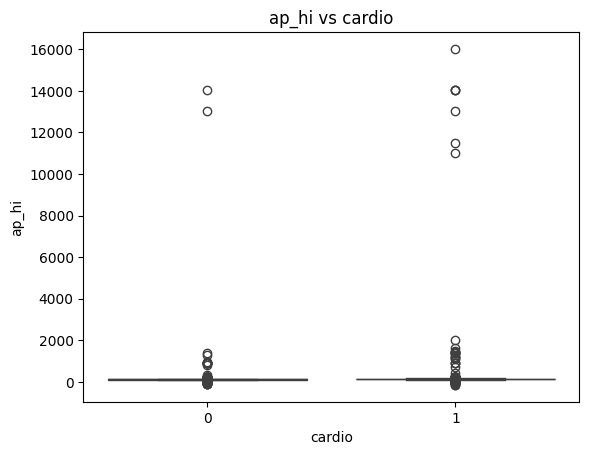

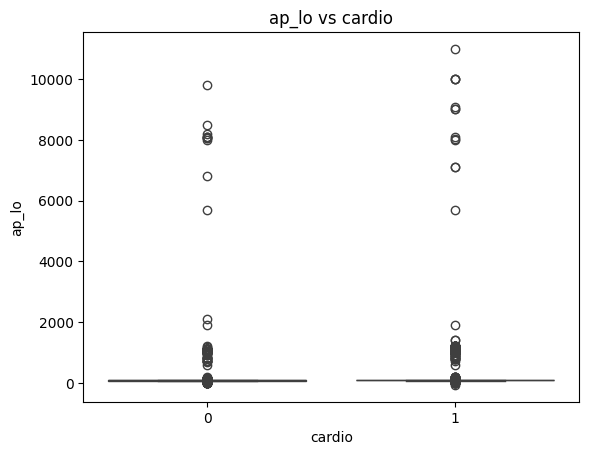

In [17]:
num_cols = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo']

for col in num_cols:
    sns.boxplot(x='cardio', y=col, data=df)
    plt.title(f'{col} vs cardio')
    plt.show()

Train/Test Split and Scaling

In [19]:
X = df.drop('cardio', axis=1)
y = df['cardio']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Train & Evaluate Models

In [21]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.7226
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

[[5353 1635]
 [2248 4764]]

KNN Accuracy: 0.6515
              precision    recall  f1-score   support

           0       0.64      0.67      0.66      6988
           1       0.66      0.63      0.64      7012

    accuracy                           0.65     14000
   macro avg       0.65      0.65      0.65     14000
weighted avg       0.65      0.65      0.65     14000

[[4700 2288]
 [2591 4421]]

SVM Accuracy: 0.7319
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73   

Compare Model Accuracies

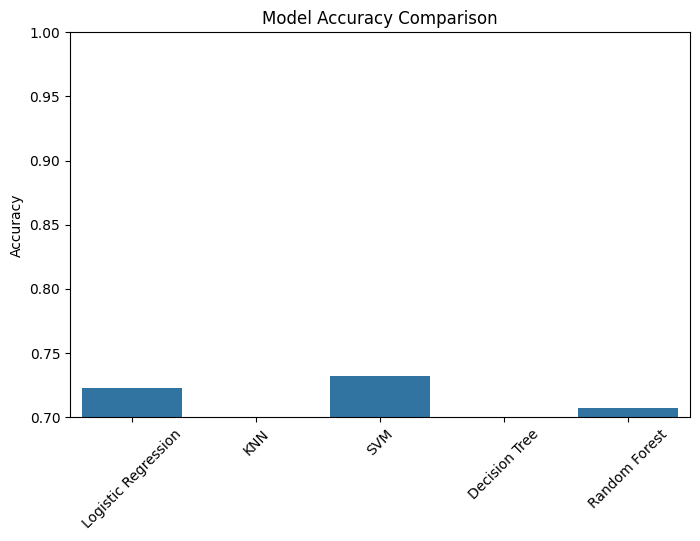

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.show()

Final Model Selection and Save

In [25]:
best_model = SVC()  # or the model with best performance
best_model.fit(X_train, y_train)

# Save model (optional)
import joblib
joblib.dump(best_model, 'heart_disease_model.pkl')

['heart_disease_model.pkl']

Steps to Run heart_disease_model.pkl

In [30]:
import joblib
import numpy as np

# Load model and scaler
model = joblib.load('heart_disease_model.pkl')
scaler = joblib.load('scaler.pkl')

# Sample input
sample = np.array([[2, 165, 72, 120, 80, 1, 1, 0, 0, 1, 52]])  # shape: (1, 11)

# Scale input and predict
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)

# Show result
result = "has heart disease" if prediction[0] == 1 else "does not have heart disease"
print(f"Prediction: Patient {result}.")


Prediction: Patient does not have heart disease.


C:\Users\sdine\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
